In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "data"
data = gpd.read_file(os.path.join(path, "서울시_전기차_충전기.gpkg"))
sgg = gpd.read_file(os.path.join(path, "서울시_시군구_5179.gpkg"))
bjd = gpd.read_file(os.path.join(path, "서울시_읍면동_5179.gpkg"))
data.head(5)

,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종,x,y,geometry
0,서울특별시,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.088822996,37.472354934,POINT (127.08882 37.47235)
1,서울특별시,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.040876628,37.514144694,POINT (127.04088 37.51414)
2,서울특별시,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.084837936,37.481670884,POINT (127.08484 37.48167)
3,서울특별시,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.049259208,37.513269685,POINT (127.04926 37.51327)
4,서울특별시,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.101604497,37.461064305,POINT (127.10160 37.46106)


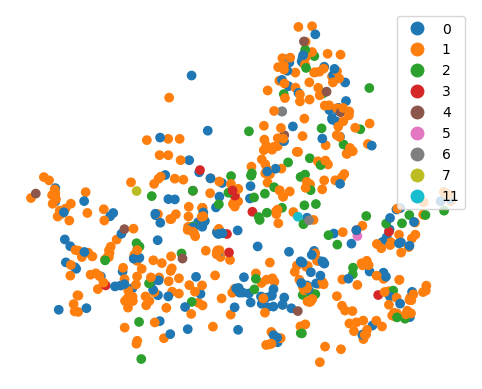

In [17]:
ax = data.plot(column="급속충전기(대)", legend=True, categorical=True)
ax.set_axis_off()
plt.show()

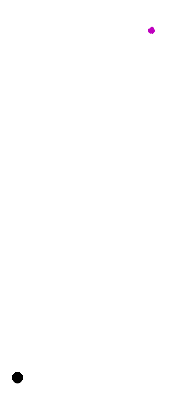

In [8]:
base = sgg.plot(
    figsize=(5, 5), color="w", edgecolor="m")
ax = data.plot(ax=base, color="k", edgecolor="k")
ax.set_axis_off()
plt.show()

In [11]:
sgg.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
data = data.to_crs(epsg=5179)
data.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

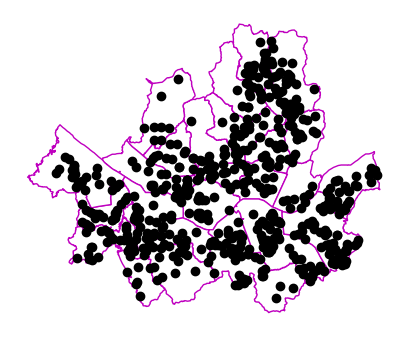

In [14]:
base = sgg.plot(
    figsize=(5, 5), color="w", edgecolor="m")
ax = data.plot(ax=base, color="k", edgecolor="k")
ax.set_axis_off()
plt.show()

In [23]:
sgg['id'] = sgg.index
sgg

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,id
0,11110,종로구,11,11110,"POLYGON ((953632.125 1959550.094, 953701.024 1...",0
1,11140,중구,34,11140,"POLYGON ((955027.187 1952453.036, 955047.545 1...",1
2,11170,용산구,1,11170,"POLYGON ((951000.905 1948665.088, 951002.878 1...",2
3,11200,성동구,1,11200,"POLYGON ((958279.957 1952093.546, 958254.730 1...",3
4,11215,광진구,49,11215,"POLYGON ((962687.190 1947354.465, 962455.549 1...",4
5,11230,동대문구,232,11230,"POLYGON ((957965.870 1953537.376, 957966.479 1...",5
6,11260,중랑구,34,11260,"POLYGON ((963865.287 1958113.346, 963867.541 1...",6
7,11290,성북구,1,11290,"POLYGON ((953716.350 1959295.667, 953730.489 1...",7
8,11305,강북구,1,11305,"POLYGON ((956385.353 1965421.172, 956473.250 1...",8
9,11320,서울시도봉구,1,11320,"POLYGON ((960479.039 1962705.197, 960478.967 1...",9


In [32]:
joined = gpd.sjoin(data, sgg[['id', 'geometry']], how='left', predicate='intersects')
joined

C:\Users\leebj\anaconda3\envs\geo\Lib\site-packages\shapely\io.py:106: RuntimeWarning: invalid value encountered in to_wkt
  return lib.to_wkt(


,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종,x,y,geometry,index_right,id
0,서울특별시,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.088822996,37.472354934,POINT (963642.558 1941538.681),22.0,22.0
1,서울특별시,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.040876628,37.514144694,POINT (959425.594 1946194.570),22.0,22.0
2,서울특별시,가람아파트,서울특별시 강남구 일원동 일원로 127,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.084837936,37.481670884,POINT (963294.742 1942573.766),22.0,22.0
3,서울특별시,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.049259208,37.513269685,POINT (960165.932 1946093.911),22.0,22.0
4,서울특별시,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.101604497,37.461064305,POINT (964767.441 1940281.210),22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
596,서울특별시,신내우디안1단지,서울특별시 중랑구 신내동 816,1,2,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.1064524,37.6171896,POINT (965268.665 1957600.582),6.0,6.0
597,서울특별시,우림골목시장 주차장,-,1,0,"SM3 Z.E,테슬라",None,None,POINT (nan nan),NaN,NaN
598,서울특별시,중랑숲리가 아파트,서울특별시 중랑구 망우동 583,1,2,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.1049545,37.6023573,POINT (965129.547 1955955.562),6.0,6.0
599,서울특별시,중랑해모로 아파트,서울특별시 중랑구 망우동 127-25,0,2,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",127.1084275,37.6011842,POINT (965435.566 1955824.128),6.0,6.0


In [33]:
joined['count'] = 1
grouped = joined.groupby('id')[['count']].count()
grouped = grouped.reset_index()
grouped

,id,count
0,0.0,17
1,1.0,17
2,2.0,24
3,3.0,20
4,4.0,11
5,5.0,17
6,6.0,19
7,7.0,22
8,8.0,10
9,9.0,26


In [34]:
result = pd.merge(sgg, grouped, on='id', how='left')
result

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,id,count
0,11110,종로구,11,11110,"POLYGON ((953632.125 1959550.094, 953701.024 1...",0,17
1,11140,중구,34,11140,"POLYGON ((955027.187 1952453.036, 955047.545 1...",1,17
2,11170,용산구,1,11170,"POLYGON ((951000.905 1948665.088, 951002.878 1...",2,24
3,11200,성동구,1,11200,"POLYGON ((958279.957 1952093.546, 958254.730 1...",3,20
4,11215,광진구,49,11215,"POLYGON ((962687.190 1947354.465, 962455.549 1...",4,11
5,11230,동대문구,232,11230,"POLYGON ((957965.870 1953537.376, 957966.479 1...",5,17
6,11260,중랑구,34,11260,"POLYGON ((963865.287 1958113.346, 963867.541 1...",6,19
7,11290,성북구,1,11290,"POLYGON ((953716.350 1959295.667, 953730.489 1...",7,22
8,11305,강북구,1,11305,"POLYGON ((956385.353 1965421.172, 956473.250 1...",8,10
9,11320,서울시도봉구,1,11320,"POLYGON ((960479.039 1962705.197, 960478.967 1...",9,26


In [35]:
result.loc[:, 'count'] = result.loc[:, 'count'].fillna(0)
result

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,id,count
0,11110,종로구,11,11110,"POLYGON ((953632.125 1959550.094, 953701.024 1...",0,17
1,11140,중구,34,11140,"POLYGON ((955027.187 1952453.036, 955047.545 1...",1,17
2,11170,용산구,1,11170,"POLYGON ((951000.905 1948665.088, 951002.878 1...",2,24
3,11200,성동구,1,11200,"POLYGON ((958279.957 1952093.546, 958254.730 1...",3,20
4,11215,광진구,49,11215,"POLYGON ((962687.190 1947354.465, 962455.549 1...",4,11
5,11230,동대문구,232,11230,"POLYGON ((957965.870 1953537.376, 957966.479 1...",5,17
6,11260,중랑구,34,11260,"POLYGON ((963865.287 1958113.346, 963867.541 1...",6,19
7,11290,성북구,1,11290,"POLYGON ((953716.350 1959295.667, 953730.489 1...",7,22
8,11305,강북구,1,11305,"POLYGON ((956385.353 1965421.172, 956473.250 1...",8,10
9,11320,서울시도봉구,1,11320,"POLYGON ((960479.039 1962705.197, 960478.967 1...",9,26


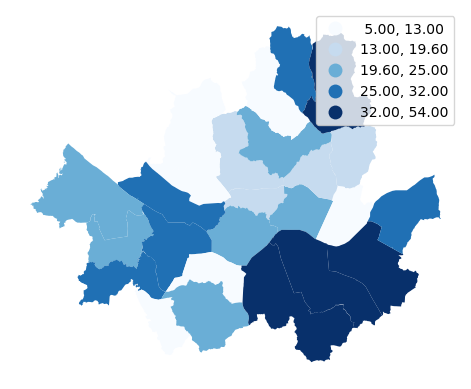

In [37]:
ax = result.plot(column='count', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
plt.show()

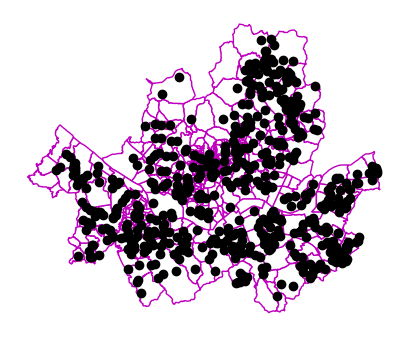

In [38]:
base = bjd.plot(
    figsize=(5, 5), color="w", edgecolor="m")
ax = data.plot(ax=base, color="k", edgecolor="k")
ax.set_axis_off()
plt.show()

In [40]:
bjd['id'] = bjd.index
joined = gpd.sjoin(data, bjd[['id', 'geometry']], how='left', predicate='intersects')
joined['count'] = 1
grouped = joined.groupby('id')[['count']].count()
grouped = grouped.reset_index()
result = pd.merge(bjd, grouped, on='id', how='left')
result.loc[:, 'count'] = result.loc[:, 'count'].fillna(0)
result

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,id,count
0,11110101,11110,청운동,1036,"POLYGON ((952450.999 1954268.329, 952468.596 1...",0,0.0
1,11110102,11110,신교동,307,"POLYGON ((952769.025 1954155.911, 952777.481 1...",1,0.0
2,11110103,11110,궁정동,1034,"POLYGON ((953233.433 1953996.945, 953243.876 1...",2,0.0
3,11110104,11110,효자동,309,"POLYGON ((953519.809 1953890.729, 953518.458 1...",3,0.0
4,11110105,11110,창성동,316,"POLYGON ((953516.097 1953734.324, 953516.497 1...",4,0.0
...,...,...,...,...,...,...,...
462,11740106,11740,둔촌동,369,"POLYGON ((967646.773 1946967.112, 967681.213 1...",462,4.0
463,11740107,11740,암사동,360,"POLYGON ((968701.832 1952177.278, 968701.626 1...",463,4.0
464,11740108,11740,성내동,354,"POLYGON ((966735.427 1948960.680, 966754.504 1...",464,5.0
465,11740109,11740,천호동,353,"POLYGON ((968337.411 1950222.682, 968340.410 1...",465,5.0


C:\Users\leebj\anaconda3\envs\geo\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


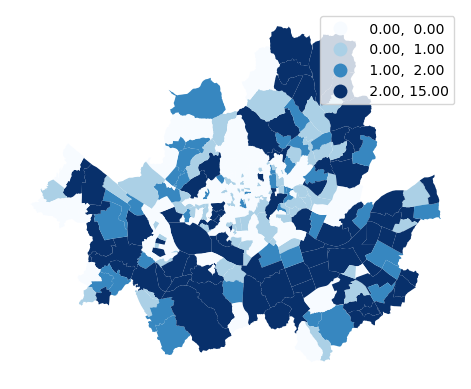

In [41]:
ax = result.plot(column='count', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
plt.show()